In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../create_dataframe/DataTrisomy21.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df.columns

Index(['thaiphuid', 'd_mom_hcgb', 'd_mom_pappa', 'd_khoangsangsaugay',
       'd_mom_nt', 'chieudaidaumong', 'tuoithainhi1', 'nguc_nhiptimthai1',
       'mat_xuongmui', 'co_nangbachhuyetvungco', 'co_khoangsangsaugay',
       'dau_duongkinhluongdinh1', 'nguc_ditattim', 'bung_chuvivongbung1',
       'chi_chieudaixuongdui1', 'benh21', 'tuoime', 'dau_chuvidau1',
       't_mom_ue3', 't_mom_afp', 't_mom_hcg', 'tuoithainhi2',
       'nguc_nhiptimthai2', 'dau_naothatben', 'mat_xuongsongmui',
       'dau_duongkinhluongdinh2', 'bung_chuvivongbung2',
       'chi_chieudaixuongdui2', 'dau_chuvidau2'],
      dtype='object')

In [4]:
for i in df.columns:
    miss= df[i].isnull().sum()
    cout= miss/df.shape[0]*100
    print(">%s miss %d (%.3f%%)"%(i,miss,cout))

>thaiphuid miss 0 (0.000%)
>d_mom_hcgb miss 3789 (56.620%)
>d_mom_pappa miss 3824 (57.143%)
>d_khoangsangsaugay miss 3982 (59.504%)
>d_mom_nt miss 5036 (75.254%)
>chieudaidaumong miss 4777 (71.384%)
>tuoithainhi1 miss 3011 (44.994%)
>nguc_nhiptimthai1 miss 2887 (43.141%)
>mat_xuongmui miss 0 (0.000%)
>co_nangbachhuyetvungco miss 0 (0.000%)
>co_khoangsangsaugay miss 4707 (70.338%)
>dau_duongkinhluongdinh1 miss 2785 (41.617%)
>nguc_ditattim miss 0 (0.000%)
>bung_chuvivongbung1 miss 2965 (44.307%)
>chi_chieudaixuongdui1 miss 2836 (42.379%)
>benh21 miss 0 (0.000%)
>tuoime miss 44 (0.658%)
>dau_chuvidau1 miss 4646 (69.426%)
>t_mom_ue3 miss 4630 (69.187%)
>t_mom_afp miss 4670 (69.785%)
>t_mom_hcg miss 4653 (69.531%)
>tuoithainhi2 miss 1856 (27.735%)
>nguc_nhiptimthai2 miss 1738 (25.971%)
>dau_naothatben miss 2450 (36.611%)
>mat_xuongsongmui miss 2732 (40.825%)
>dau_duongkinhluongdinh2 miss 1657 (24.761%)
>bung_chuvivongbung2 miss 1773 (26.494%)
>chi_chieudaixuongdui2 miss 1681 (25.120%)
>dau

In [5]:
df.replace({'nguc_ditattim':{2:0}, 'co_nangbachhuyetvungco':{2:0}, 'mat_xuongmui':{2:0}}, inplace= True)

In [6]:
print(df['benh21'].value_counts())
print(df['nguc_ditattim'].value_counts())
print(df['co_nangbachhuyetvungco'].value_counts())
print(df['mat_xuongmui'].value_counts())

benh21
0.0    5714
1.0     978
Name: count, dtype: int64
nguc_ditattim
0.0    6328
1.0     364
Name: count, dtype: int64
co_nangbachhuyetvungco
0.0    6647
1.0      45
Name: count, dtype: int64
mat_xuongmui
1.0    6675
0.0      17
Name: count, dtype: int64


In [7]:
col_num = ['tuoime', 'tuoithainhi1', 'co_khoangsangsaugay', 'nguc_nhiptimthai1','chieudaidaumong', 'dau_duongkinhluongdinh1',
       'bung_chuvivongbung1', 'chi_chieudaixuongdui1', 'dau_chuvidau1',
       'd_mom_hcgb', 'd_mom_pappa', 'd_mom_nt', 'd_khoangsangsaugay', 
       'tuoithainhi2', 'mat_xuongsongmui', 'nguc_nhiptimthai2',
       'dau_duongkinhluongdinh2', 'bung_chuvivongbung2',
       'chi_chieudaixuongdui2', 'dau_chuvidau2', 'dau_naothatben', 't_mom_ue3',
       't_mom_afp', 't_mom_hcg']
for i in df.index:
    for j in col_num: 
        if df.loc[i, j] == 0:
            df.loc[i, j] = np.NaN

for i in df.index:
    if df.loc[i, 'mat_xuongmui'] == 0:
        df.loc[i, 'mat_xuongsongmui']= 0

In [8]:
for i in df.index:
    if np.isnan(df.loc[i, 'co_khoangsangsaugay']) and not np.isnan(df.loc[i, 'd_khoangsangsaugay']):
        df.loc[i, 'co_khoangsangsaugay'] = df.loc[i, 'd_khoangsangsaugay']

In [9]:
imp_col1 = ['d_mom_hcgb', 'd_mom_pappa', 'd_mom_nt', 'co_khoangsangsaugay'] # double
imp_col2 = ['t_mom_ue3', 't_mom_afp', 't_mom_hcg', 'mat_xuongsongmui'] # triple
for i in df.index:
    cnt1 = 0
    for j in imp_col1:
        if np.isnan(df.loc[i, j]) == False:
            cnt1 += 1
    cnt2 = 0
    for j in imp_col2:
        if np.isnan(df.loc[i, j]) == False:
            cnt2 += 1
    df.loc[i, 'double'] = cnt1
    df.loc[i, 'triple'] = cnt2

In [10]:
df.columns

Index(['thaiphuid', 'd_mom_hcgb', 'd_mom_pappa', 'd_khoangsangsaugay',
       'd_mom_nt', 'chieudaidaumong', 'tuoithainhi1', 'nguc_nhiptimthai1',
       'mat_xuongmui', 'co_nangbachhuyetvungco', 'co_khoangsangsaugay',
       'dau_duongkinhluongdinh1', 'nguc_ditattim', 'bung_chuvivongbung1',
       'chi_chieudaixuongdui1', 'benh21', 'tuoime', 'dau_chuvidau1',
       't_mom_ue3', 't_mom_afp', 't_mom_hcg', 'tuoithainhi2',
       'nguc_nhiptimthai2', 'dau_naothatben', 'mat_xuongsongmui',
       'dau_duongkinhluongdinh2', 'bung_chuvivongbung2',
       'chi_chieudaixuongdui2', 'dau_chuvidau2', 'double', 'triple'],
      dtype='object')

In [11]:
df.rename(columns={'nguc_nhiptimthai2': 'nguc_nhiptimthai', 'dau_duongkinhluongdinh2': 'dau_duongkinhluongdinh', 'bung_chuvivongbung2': 'bung_chuvivongbung', 'chi_chieudaixuongdui2': 'chi_chieudaixuongdui', 'dau_chuvidau2': 'dau_chuvidau'})
df.drop(['nguc_nhiptimthai1', 'dau_duongkinhluongdinh1', 'bung_chuvivongbung1', 'chi_chieudaixuongdui1', 'dau_chuvidau1',], axis=1, inplace=True)
df.dropna(how='any').columns
df['cahai']= df['double'] + df['triple']

In [12]:
t = df[(df['cahai']==8)|(df['triple']==4)|(df['double']==4)] 
t[t['benh21']==1]

,thaiphuid,d_mom_hcgb,d_mom_pappa,d_khoangsangsaugay,d_mom_nt,chieudaidaumong,tuoithainhi1,mat_xuongmui,co_nangbachhuyetvungco,co_khoangsangsaugay,...,nguc_nhiptimthai2,dau_naothatben,mat_xuongsongmui,dau_duongkinhluongdinh2,bung_chuvivongbung2,chi_chieudaixuongdui2,dau_chuvidau2,double,triple,cahai
19,0004696045,1.344,0.266,2.8,NaN,NaN,35.0,1.0,0.0,2.8,...,126.0,10.0,5.0,154.0,105.0,19.0,114.0,3.0,4.0,7.0
35,0007362081,3.110,0.550,2.5,1.52,NaN,31.0,1.0,0.0,2.5,...,112.0,NaN,3.0,150.0,92.0,17.0,108.0,4.0,1.0,5.0
41,0008752045,NaN,NaN,NaN,NaN,63.0,21.0,1.0,0.0,2.8,...,140.0,4.0,6.0,155.0,113.0,24.0,124.0,1.0,4.0,5.0
51,0011039045,2.270,0.580,2.1,1.58,NaN,36.0,1.0,0.0,2.1,...,121.0,6.0,3.0,150.0,112.0,17.0,115.0,4.0,1.0,5.0
62,0012373203,1.960,0.730,1.7,0.97,NaN,40.0,1.0,0.0,1.7,...,143.0,6.0,4.0,139.0,127.0,24.0,124.0,4.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,2000137828,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,...,149.0,11.0,5.5,46.0,130.0,23.0,162.0,0.0,4.0,4.0
6305,21000187196,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,...,152.0,6.0,4.8,36.0,109.0,19.0,NaN,0.0,4.0,4.0
6327,2100033216,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,140.0,3.0,2.8,46.0,157.0,34.0,166.0,0.0,4.0,4.0
6328,2100033216,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,145.0,3.0,5.5,51.0,174.0,32.0,186.0,0.0,4.0,4.0


In [13]:
t['benh21'].value_counts()

benh21
0.0    2608
1.0     299
Name: count, dtype: int64

In [14]:
t[t['cahai']==8][['d_mom_hcgb', 'd_mom_pappa', 'd_mom_nt', 't_mom_ue3', 't_mom_afp', 't_mom_hcg', 'benh21' ]]['benh21'].value_counts()

benh21
0.0    123
1.0      4
Name: count, dtype: int64

In [15]:
df_test = pd.concat([t[t['benh21']==1], t[(t['benh21']==0)&~(t['cahai']==8)].sample(2608-123), t[t['cahai']==8]])
df_test = df_test.drop(['double', 'triple', 'cahai', 'thaiphuid', 'nguc_ditattim', 'mat_xuongmui', 'co_nangbachhuyetvungco'], axis=1)
df_test['benh21'].value_counts()

benh21
0.0    2608
1.0     303
Name: count, dtype: int64

In [16]:
df_train = df.drop(df_test.index).drop(['double', 'triple', 'cahai', 'thaiphuid', 'nguc_ditattim', 'mat_xuongmui', 'co_nangbachhuyetvungco'], axis=1)
df_train['benh21'].value_counts()

benh21
0.0    3106
1.0     679
Name: count, dtype: int64

In [17]:
df_train.rename(columns={'nguc_nhiptimthai2': 'nguc_nhiptimthai',
       'dau_duongkinhluongdinh2': 'dau_duongkinhluongdinh', 'bung_chuvivongbung2': 'bung_chuvivongbung',
       'chi_chieudaixuongdui2': 'chi_chieudaixuongdui', 'dau_chuvidau2': 'dau_chuvidau'}, inplace=True)
df_test.rename(columns={'nguc_nhiptimthai2': 'nguc_nhiptimthai',
       'dau_duongkinhluongdinh2': 'dau_duongkinhluongdinh', 'bung_chuvivongbung2': 'bung_chuvivongbung',
       'chi_chieudaixuongdui2': 'chi_chieudaixuongdui', 'dau_chuvidau2': 'dau_chuvidau'}, inplace=True)

In [18]:
df.isnull().sum()/df.shape[0] * 100

thaiphuid                   0.000000
d_mom_hcgb                 56.619845
d_mom_pappa                57.142857
d_khoangsangsaugay         59.503885
d_mom_nt                   75.254035
chieudaidaumong            71.383742
tuoithainhi1               44.994023
mat_xuongmui                0.000000
co_nangbachhuyetvungco      0.000000
co_khoangsangsaugay        41.811118
nguc_ditattim               0.000000
benh21                      0.000000
tuoime                      0.657501
t_mom_ue3                  69.187089
t_mom_afp                  69.784818
t_mom_hcg                  69.530783
tuoithainhi2               27.734608
nguc_nhiptimthai2          25.971309
dau_naothatben             36.610879
mat_xuongsongmui           40.570831
dau_duongkinhluongdinh2    24.760909
bung_chuvivongbung2        26.494322
chi_chieudaixuongdui2      25.119546
dau_chuvidau2              30.095637
double                      0.000000
triple                      0.000000
cahai                       0.000000
d

In [19]:
df_train.drop(['d_mom_nt'], axis=1, inplace=True)
df_test.drop(['d_mom_nt'], axis=1, inplace=True)

In [20]:
df_train.to_csv('./train21.csv')
df_test.to_csv('./test21.csv')

## EDA dataframe

In [21]:
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6696 entries, 0 to 6695
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   d_mom_hcgb              2907 non-null   float64
 1   d_mom_pappa             2872 non-null   float64
 2   d_khoangsangsaugay      2714 non-null   float64
 3   chieudaidaumong         1915 non-null   float64
 4   tuoithainhi1            3685 non-null   float64
 5   co_khoangsangsaugay     3898 non-null   float64
 6   benh21                  6696 non-null   float64
 7   tuoime                  6652 non-null   float64
 8   t_mom_ue3               2066 non-null   float64
 9   t_mom_afp               2026 non-null   float64
 10  t_mom_hcg               2043 non-null   float64
 11  tuoithainhi2            4840 non-null   float64
 12  nguc_nhiptimthai        4958 non-null   float64
 13  dau_naothatben          4246 non-null   float64
 14  mat_xuongsongmui        3981 non-null   

Text(0.5, 1.0, 'Distribution of Target Label')

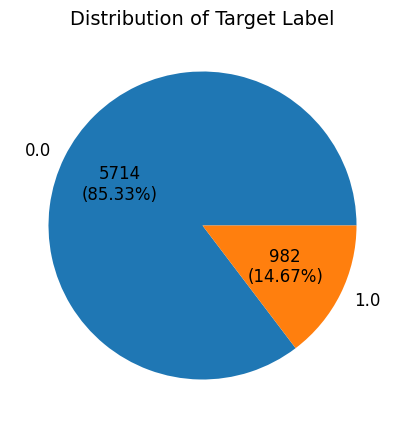

In [22]:
plt.figure(figsize=(5,5))

def auto_fmt(value):
    return '{:.0f}\n({:.2f}%)'.format(df_combined['benh21'].value_counts().sum()*value/100,value)

count_label = df_combined['benh21'].value_counts().rename_axis('benh21').reset_index(name='Counts')

fig = plt.gcf()
plt.pie(x=count_label['Counts'], labels=count_label['benh21'], autopct=auto_fmt, textprops={'fontsize': 12})
plt.title('Distribution of Target Label',  fontsize = 14)

In [23]:
for i in df_combined.columns:
    miss= df_combined[i].isnull().sum()
    cout= miss/df_combined.shape[0]*100
    print(">%s miss %d (%.2f%%)"%(i,miss,cout))

>d_mom_hcgb miss 3789 (56.59%)
>d_mom_pappa miss 3824 (57.11%)
>d_khoangsangsaugay miss 3982 (59.47%)
>chieudaidaumong miss 4781 (71.40%)
>tuoithainhi1 miss 3011 (44.97%)
>co_khoangsangsaugay miss 2798 (41.79%)
>benh21 miss 0 (0.00%)
>tuoime miss 44 (0.66%)
>t_mom_ue3 miss 4630 (69.15%)
>t_mom_afp miss 4670 (69.74%)
>t_mom_hcg miss 4653 (69.49%)
>tuoithainhi2 miss 1856 (27.72%)
>nguc_nhiptimthai miss 1738 (25.96%)
>dau_naothatben miss 2450 (36.59%)
>mat_xuongsongmui miss 2715 (40.55%)
>dau_duongkinhluongdinh miss 1657 (24.75%)
>bung_chuvivongbung miss 1773 (26.48%)
>chi_chieudaixuongdui miss 1681 (25.10%)
>dau_chuvidau miss 2014 (30.08%)


<Figure size 1000x600 with 0 Axes>

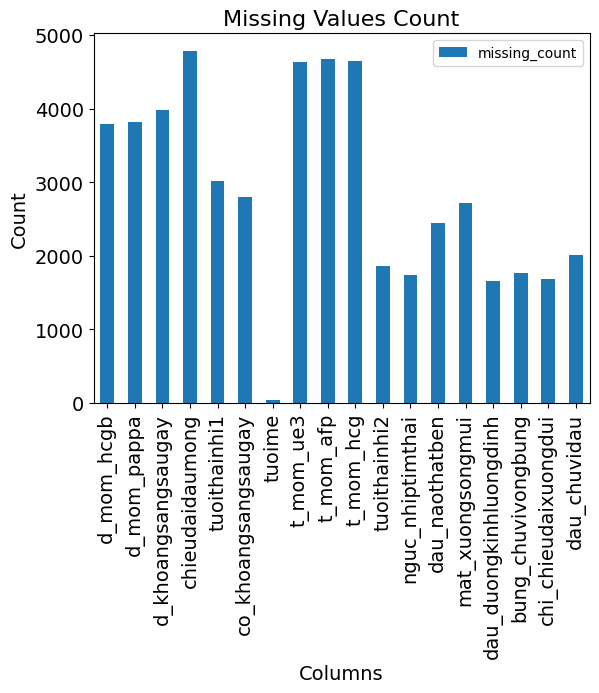

In [24]:
plt.figure(figsize=(10, 6))

df_miss = df_combined.isna().sum()
df_miss = df_miss.reset_index()
df_miss.columns = ['feature', 'missing_count']
df_miss = df_miss.loc[df_miss['missing_count'] > 0]

df_miss.plot.bar(x='feature', y='missing_count')

plt.title('Missing Values Count', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='x', which='major', labelsize=14)
plt.tick_params(axis='y', which='major', labelsize=14)
plt.show()

In [ ]:
df_combined.to_csv('./combined21.csv')